In [1]:
import pandas as pd

In [5]:
# Reading the data from both files
data_1 = pd.read_csv("Amazon Customer Behavior Survey.csv")
data_2 = pd.read_csv("amazon.csv")

In [6]:
# Displaying the first few rows of each dataset to understand their structure
data_1_head = data_1.head()
data_2_head = data_2.head()

data_1_head, data_2_head

(                        Timestamp  age             Gender  \
 0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
 1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
 2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
 3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
 4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   
 
        Purchase_Frequency                                Purchase_Categories  \
 0       Few times a month                           Beauty and Personal Care   
 1            Once a month                               Clothing and Fashion   
 2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
 3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
 4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   
 
   Personalized_Recommendation_Frequency Browsing_Frequency  \
 0                                   Yes   Few times a week   
 1          

In [7]:
# Performing initial data analysis on the customer survey data (data_1)
# Analyzing the distribution of various features like age, gender, purchase frequency, etc.

# Summary statistics for numerical data
numerical_summary = data_1.describe()

# Frequency distribution of categorical data
gender_distribution = data_1['Gender'].value_counts()
purchase_freq_distribution = data_1['Purchase_Frequency'].value_counts()
recommendation_freq_distribution = data_1['Personalized_Recommendation_Frequency'].value_counts()
browsing_freq_distribution = data_1['Browsing_Frequency'].value_counts()

numerical_summary, gender_distribution, purchase_freq_distribution, recommendation_freq_distribution, browsing_freq_distribution

(              age  Customer_Reviews_Importance  \
 count  602.000000                   602.000000   
 mean    30.790698                     2.480066   
 std     10.193276                     1.185226   
 min      3.000000                     1.000000   
 25%     23.000000                     1.000000   
 50%     26.000000                     3.000000   
 75%     36.000000                     3.000000   
 max     67.000000                     5.000000   
 
        Personalized_Recommendation_Frequency   Rating_Accuracy   \
 count                              602.000000        602.000000   
 mean                                 2.699336          2.672757   
 std                                  1.042028          0.899744   
 min                                  1.000000          1.000000   
 25%                                  2.000000          2.000000   
 50%                                  3.000000          3.000000   
 75%                                  3.000000          3.00000

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# For the purpose of segmentation, we'll consider age and a few selected categorical features.
# We'll first need to convert categorical data to numerical for clustering purposes.

# Mapping categorical data to numerical
data_1['Gender'] = data_1['Gender'].map({'Female': 0, 'Male': 1, 'Prefer not to say': 2, 'Others': 3})
data_1['Purchase_Frequency'] = data_1['Purchase_Frequency'].map({
    'Less than once a month': 0, 
    'Once a month': 1, 
    'Few times a month': 2, 
    'Once a week': 3, 
    'Multiple times a week': 4
})
data_1['Personalized_Recommendation_Frequency'] = data_1['Personalized_Recommendation_Frequency'].map({'No': 0, 'Sometimes': 1, 'Yes': 2})
data_1['Browsing_Frequency'] = data_1['Browsing_Frequency'].map({
    'Rarely': 0, 
    'Few times a month': 1, 
    'Few times a week': 2, 
    'Multiple times a day': 3
})

In [10]:
# For customer segmentation, we'll focus on age, gender, purchase frequency, personalized recommendation frequency, and browsing frequency
segmentation_features = ['age', 'Gender', 'Purchase_Frequency', 'Personalized_Recommendation_Frequency', 'Browsing_Frequency']
segmentation_data = data_1[segmentation_features].dropna()

In [11]:
# Using KMeans for segmentation
kmeans = KMeans(n_clusters=4, random_state=0)  # choosing 4 clusters arbitrarily
segmentation_data['Cluster'] = kmeans.fit_predict(segmentation_data)

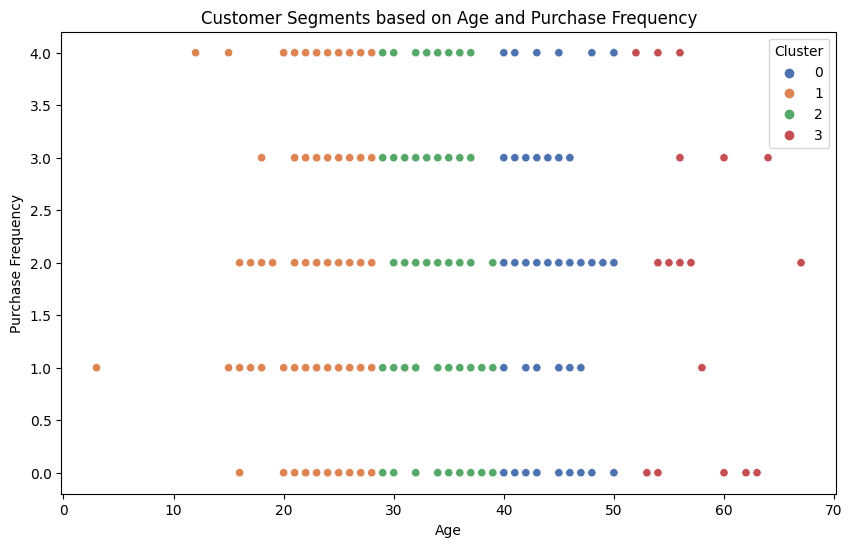

In [12]:
# Visualizing the segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=segmentation_data, x='age', y='Purchase_Frequency', hue='Cluster', palette='deep')
plt.title('Customer Segments based on Age and Purchase Frequency')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency')
plt.show()

In [13]:
# Displaying the cluster centers to understand the average characteristics of each segment
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=segmentation_features)
cluster_centers_df

,age,Gender,Purchase_Frequency,Personalized_Recommendation_Frequency,Browsing_Frequency
0,44.532609,0.706522,1.956522,0.847826,1.586957
1,23.173780,0.548780,1.649390,0.756098,1.472561
2,33.843137,0.692810,1.921569,0.803922,1.633987
3,57.241379,0.896552,2.000000,0.827586,1.689655


In [15]:
# Hypothetical assumptions for demonstration:
# - Younger customers (age < 35) might be more inclined towards sustainability.
# - Certain purchase categories like 'Beauty and Personal Care', 'Clothing and Fashion' 
#   might have a higher propensity for sustainable products.

# Adding a hypothetical 'Sustainability Interest' column based on these assumptions
data_1['Sustainability_Interest'] = data_1.apply(
    lambda row: 'High' if row['age'] < 35 and 
    ('Beauty and Personal Care' in row['Purchase_Categories'] or 'Clothing and Fashion' in row['Purchase_Categories']) 
    else 'Low', axis=1)

In [16]:
# Reapplying clustering to the dataset with the newly added 'Sustainability_Interest' feature
segmentation_data = data_1[segmentation_features + ['Sustainability_Interest']]

In [17]:
# Convert 'Sustainability_Interest' to numerical for clustering
segmentation_data['Sustainability_Interest'] = segmentation_data['Sustainability_Interest'].map({'Low': 0, 'High': 1})

C:\Users\goekc\AppData\Local\Temp\ipykernel_28444\1020030682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmentation_data['Sustainability_Interest'] = segmentation_data['Sustainability_Interest'].map({'Low': 0, 'High': 1})


In [18]:
# Reapplying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
segmentation_data['Cluster'] = kmeans.fit_predict(segmentation_data[segmentation_features])

C:\Users\goekc\AppData\Local\Temp\ipykernel_28444\528226403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmentation_data['Cluster'] = kmeans.fit_predict(segmentation_data[segmentation_features])


In [19]:
# Now, analyzing the distribution of sustainability interest across the new customer segments
sustainability_interest_by_segment = segmentation_data.groupby('Cluster')['Sustainability_Interest'].value_counts().unstack()

# Displaying the distribution
sustainability_interest_by_segment

Sustainability_Interest,0,1
Cluster,,
0,92.0,NaN
1,48.0,280.0
2,70.0,83.0
3,29.0,NaN


In [20]:
# Ensure review content is string for sentiment analysis
data_2['review_content'] = data_2['review_content'].astype(str)

In [22]:
from textblob import TextBlob

In [23]:
# Perform sentiment analysis on the sales data
data_2['Polarity'] = data_2['review_content'].apply(lambda x: TextBlob(x).sentiment.polarity)

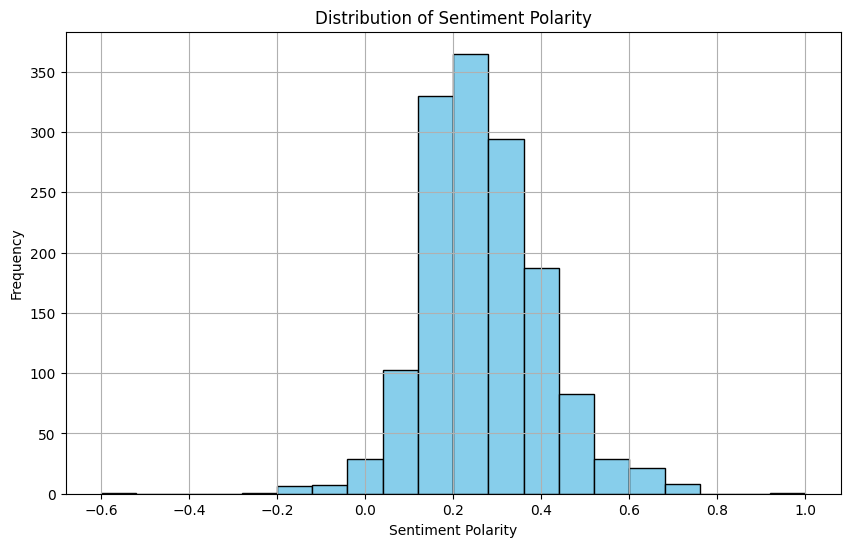

In [26]:
# Histogram of sentiment polarity distribution
plt.figure(figsize=(10, 6))
plt.hist(data_2['Polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('sentiment_polarity_distribution_corrected.png')
plt.show()
plt.close()